# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Mortality Prediction Using National Health and Nutrition Examination Survey Data
## CS109A/AC209A



**Harvard University**<br/>
**Fall 2021**<br/>
**Team members**: Rudra Barua, Rosan Bishwakarma, Albert Zhang, Jeremy Zhang


<hr style="height:2pt">

**Summary**: 

----

Background...

Goals...

---------------


## Install Modules and Packages

### Install Modules

In [ ]:
# Install these packages
!pip install missingno
!pip install shap

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Using magic line in Colab
# %tensorflow_version 1.x
# Install a specific version of tensor flow
# !pip install tensorflow==1.15.0

#### Import necessary packages

In [ ]:
# Import libraries

import random
random_seed = 0
random.seed(random_seed)

import os
import sys

import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

%matplotlib inline

import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline
pd.set_option('display.width', 1000)

# extra packages
import missingno as msno

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

import shap

# Exploratory Data Analysis

### Data Overview

Title of Dataset

Summary of data

Source: DATASET SOURCE

In [ ]:
# Load the data, set random seed and display
mortality = pd.read_csv("Project_B_NHANESI_full.csv")

np.random.seed(random_seed)

display(mortality.shape)

(14407, 42)

### Visualizations

## Missing Values

In [ ]:
# Visualizes correlations between missing values
# msno.heatmap(mortality.sample(500)).set(title='Correlation of Missing Data Heatap')

In [ ]:
# Get the datatypes of each column
mortality_datatypes = pd.DataFrame(mortality.dtypes)
# Get the number of 
mortality_null_count = mortality.count()

display(mortality_datatypes)

,0
sequence_ID,int64
sex_isFemale,bool
race,int64
poverty_index,float64
age,int64
serum_albumin,float64
alkaline_phosphatase,float64
SGOT,float64
BUN,float64
calcium,float64


## Column Information

In [ ]:
column_info = pd.concat([pd.DataFrame(mortality.dtypes), mortality.count()], axis=1)
display(column_info)

,0,0
sequence_ID,int64,14407
sex_isFemale,bool,14407
race,int64,14407
poverty_index,float64,11348
age,int64,14407
serum_albumin,float64,10801
alkaline_phosphatase,float64,6364
SGOT,float64,6315
BUN,float64,2935
calcium,float64,6256


### Visualization of Data

#### Scatter Plot of Numerical Variables

##### Scatter Plot of Predictors vs Y

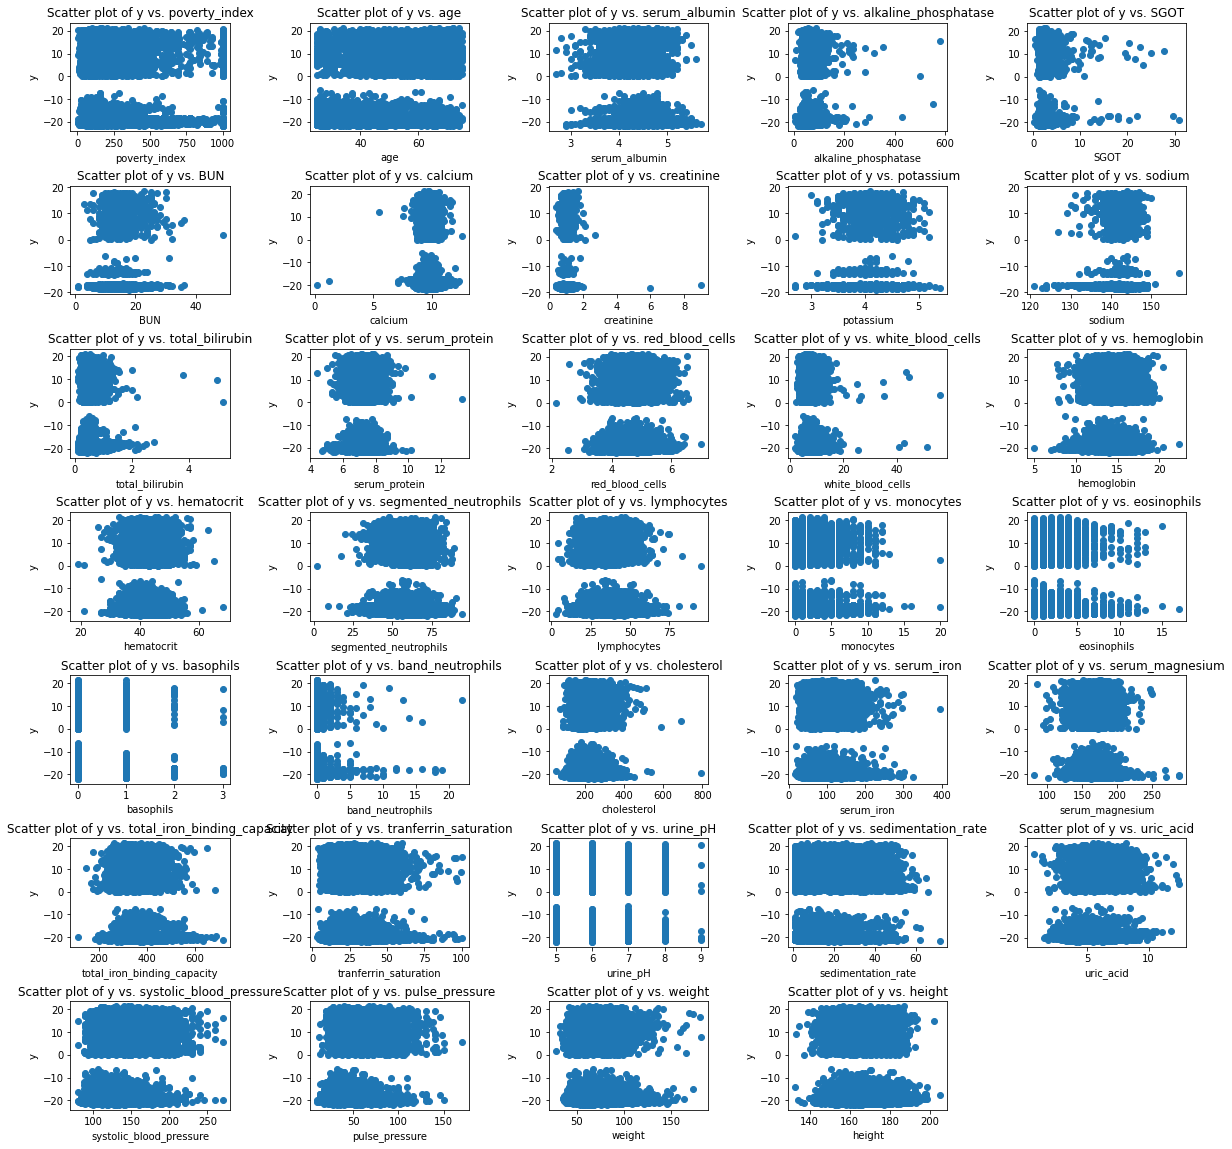

In [ ]:
# Define numericcal values
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']

# Define categorical values
categorical = mortality.drop(columns=numerical+['sequence_ID','y']).columns

# define response variables
y = mortality['y']

# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()

# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)

# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Scatter plot of y vs. {pred}')

# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()

#### Scatter Plot of Predictors of abs(y) 

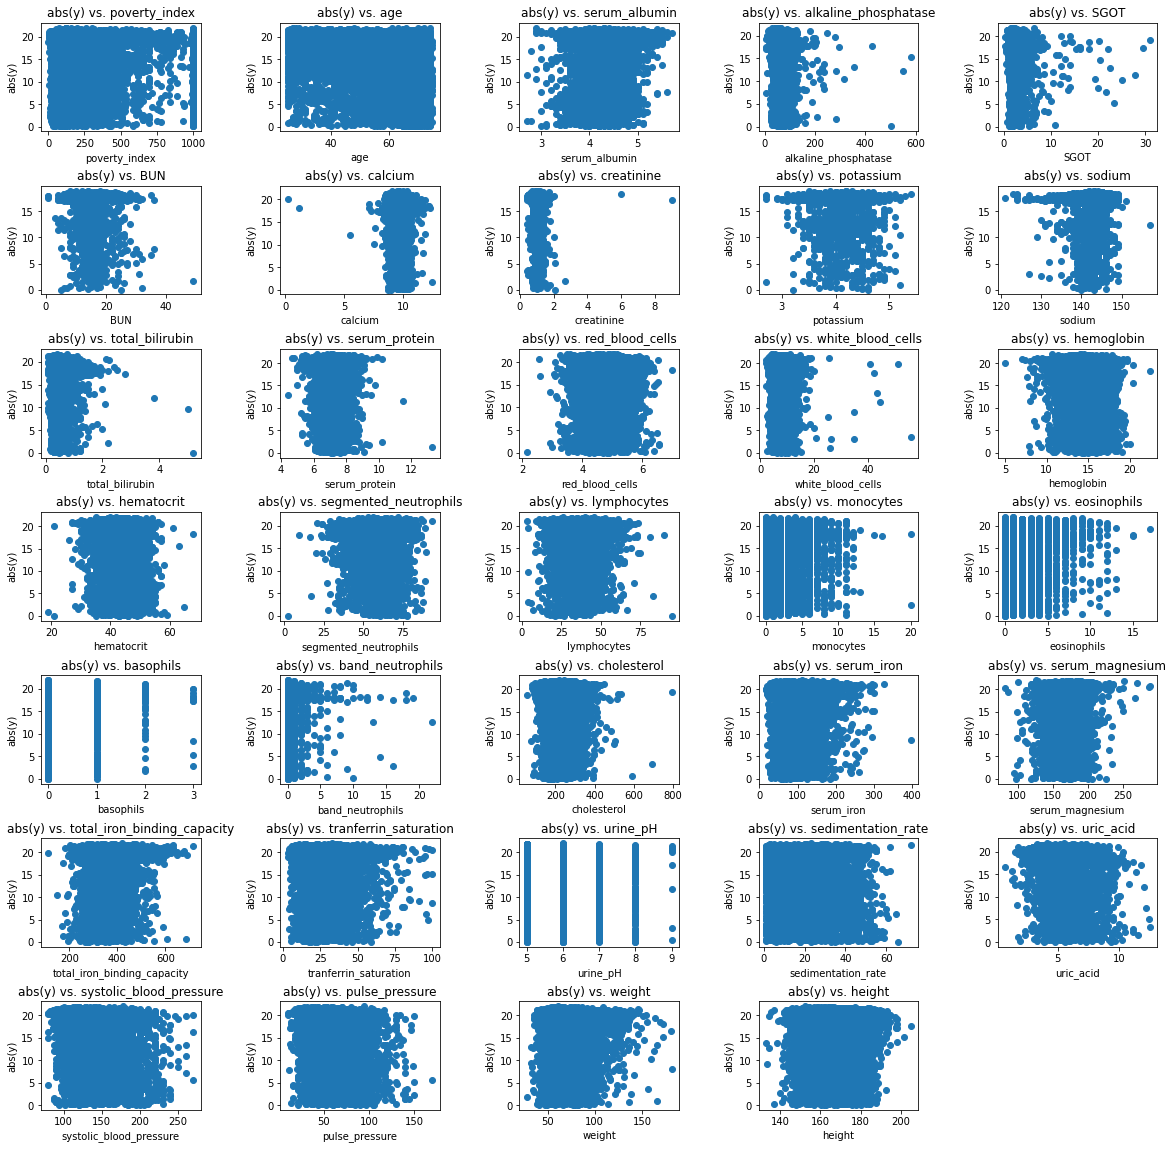

In [ ]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']

# Absolute value of y
y_abs = abs(mortality['y'])
mortality['abs_y'] = y_abs


# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()

# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)

# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y_abs)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('abs(y)')
    axes[i].set_title(f'abs(y) vs. {pred}')

# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()

### Visualizations based on Categorical Variables

### Boxplots

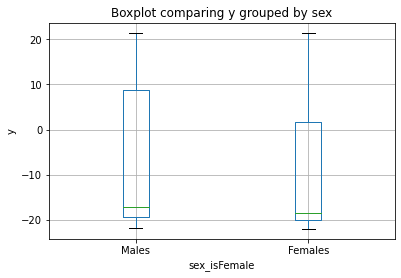

In [ ]:
# Create a boxplot comparing years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('y')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by sex')
plt.show()

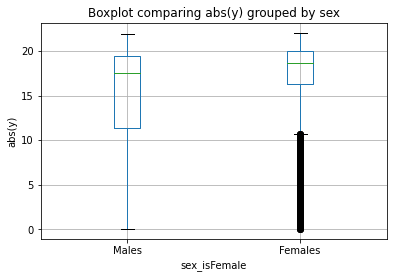

In [ ]:
# Create a boxplot comparing absolute years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='abs_y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by sex')
plt.show()

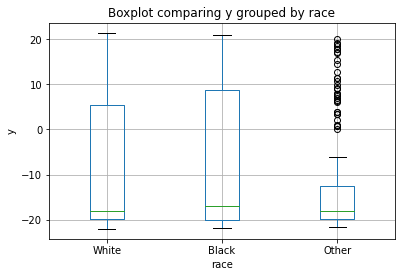

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='y', by='race', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing y grouped by race')
plt.show()

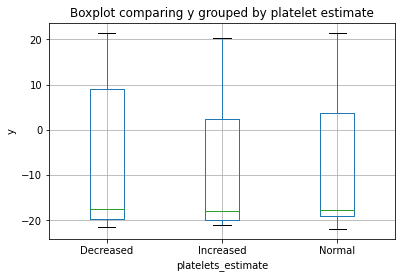

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('y')
axes[0].set_title('Boxplot comparing y grouped by platelet estimate')
plt.show()

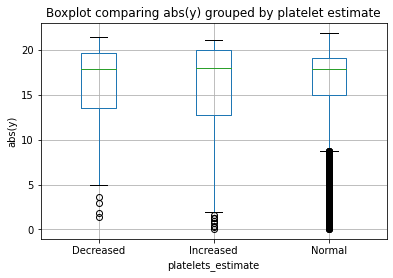

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='abs_y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('abs(y)')
axes[0].set_title('Boxplot comparing abs(y) grouped by platelet estimate')
plt.show()

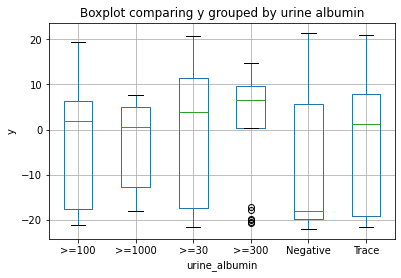

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine albumin')
plt.show()

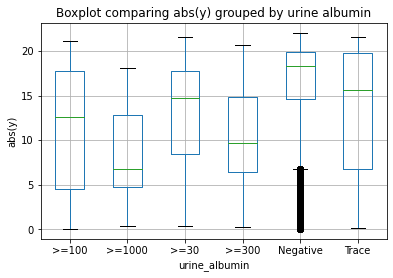

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='abs_y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine albumin')
plt.show()

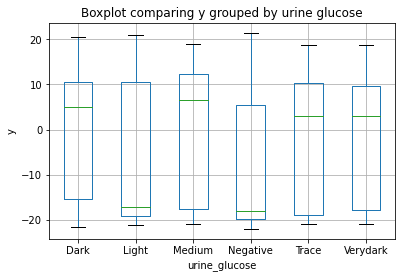

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine glucose')
plt.show()

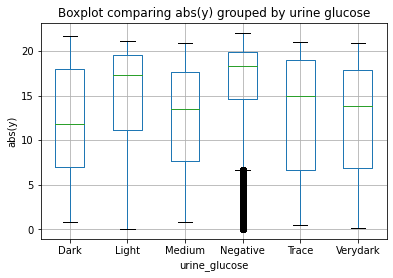

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='abs_y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine glucose')
plt.show()

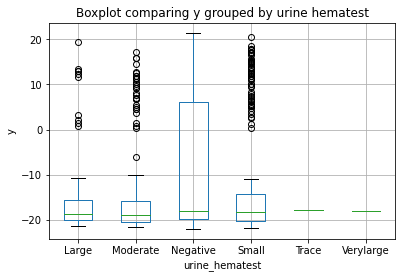

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine hematest')
plt.show()

### Pairplot

In [ ]:
# pairplot (takes 15min to finish)
# Creates a scatterplot for each pair of numerical predictors
#sns.pairplot(mortality[numerical], corner=True)

### Correlations

In [ ]:
# List to store combinations of predictors/response
pred_combos = []
# Get correlation matrix
correlations = mortality.corr()
# Get all the column names in our correlation matrix
column_names = correlations.columns
count = 0
# Go through each colmn
for i in range(len(column_names)):
    col = column_names[i]
    for j in range(i,len(column_names)):
        row = column_names[j]
        # Check if the correlation between the response and predictor
        # or correlation between two predictors is above 0.6
        if abs(correlations[row][col]) > 0.6 and col != row:
            # Store that combination and correlation
            pred_combos.append((row, col, correlations[row][col]))
display(correlations)

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y,abs_y
sequence_ID,1.000,-0.023,-1.492e-01,-0.021,-0.075,0.010,0.070,3.783e-02,0.022,0.019,6.171e-02,-0.032,-2.023e-01,0.208,-0.093,0.071,3.055e-02,-6.770e-02,-0.071,-0.005,-6.426e-02,0.273,-4.009e-02,0.110,-7.278e-03,-0.003,-0.022,6.451e-02,0.004,-0.026,-2.088e-01,-0.264,0.034,-7.592e-02,-1.107e-01,0.014,0.059,-9.111e-02,-0.056
sex_isFemale,-0.023,1.000,1.647e-02,-0.064,-0.136,-0.118,-0.080,-1.650e-01,-0.245,-0.076,-3.395e-01,-0.140,-8.127e-02,-0.234,0.002,-0.454,-2.578e-02,-5.654e-01,-0.551,0.001,3.555e-02,-0.060,-9.066e-02,-0.007,-3.576e-03,0.005,-0.108,-8.559e-02,0.180,-0.165,2.909e-02,0.272,-0.465,-8.259e-02,-1.526e-02,-0.346,-0.674,-1.619e-01,0.187
race,-0.149,0.016,1.000e+00,-0.152,-0.008,-0.088,0.034,7.269e-02,-0.075,0.030,-1.688e-02,-0.004,9.604e-05,-0.056,0.219,-0.075,-1.008e-01,-1.759e-01,-0.120,-0.163,1.779e-01,-0.038,8.324e-03,-0.026,-3.496e-02,-0.017,-0.076,-1.360e-01,-0.021,-0.063,3.069e-02,0.181,0.064,9.968e-02,5.192e-02,0.045,-0.050,5.189e-02,-0.056
poverty_index,-0.021,-0.064,-1.517e-01,1.000,-0.038,0.073,-0.058,-2.153e-02,NaN,-0.007,NaN,NaN,NaN,0.022,-0.097,0.043,5.866e-03,8.699e-02,0.068,0.024,-2.819e-02,0.021,9.045e-03,-0.009,-1.485e-02,0.019,0.088,3.759e-02,-0.022,0.086,2.477e-03,-0.130,0.011,-9.401e-02,-7.972e-02,-0.019,0.110,-7.689e-02,0.100
age,-0.075,-0.136,-7.883e-03,-0.038,1.000,-0.208,0.194,3.988e-02,0.339,-0.049,1.413e-01,0.090,5.840e-02,-0.047,-0.039,0.021,-7.152e-02,7.415e-02,0.102,0.014,-7.539e-03,-0.029,1.684e-02,-0.030,-1.710e-02,0.347,-0.017,7.878e-02,-0.252,0.081,-5.962e-02,0.202,0.145,5.059e-01,4.999e-01,0.038,-0.121,5.540e-01,-0.453
serum_albumin,0.010,-0.118,-8.802e-02,0.073,-0.208,1.000,-0.101,2.728e-02,NaN,0.370,NaN,NaN,NaN,0.121,0.445,0.203,1.038e-02,2.508e-01,0.217,-0.016,6.014e-03,0.068,-3.178e-02,0.021,1.511e-02,0.068,0.112,1.684e-01,0.126,0.044,1.587e-02,-0.254,0.119,-6.357e-02,-9.877e-02,0.026,0.126,-1.462e-01,0.171
alkaline_phosphatase,0.070,-0.080,3.396e-02,-0.058,0.194,-0.101,1.000,1.746e-01,0.028,0.006,4.410e-02,0.040,-5.335e-03,0.106,0.102,0.075,7.619e-02,7.219e-02,0.086,0.042,-5.759e-02,0.049,7.420e-03,0.012,3.219e-03,0.103,-0.027,1.227e-02,-0.018,-0.017,-2.009e-02,0.133,0.134,1.770e-01,1.383e-01,0.107,-0.014,1.760e-01,-0.177
SGOT,0.038,-0.165,7.269e-02,-0.022,0.040,0.027,0.175,1.000e+00,0.057,0.065,4.323e-02,0.006,2.512e-02,0.203,0.142,0.075,6.614e-03,1.177e-01,0.123,-0.031,2.292e-02,0.035,-1.149e-02,0.023,-7.797e-04,0.030,0.165,-6.169e-02,0.036,0.135,-1.937e-02,0.004,0.190,9.112e-02,3.933e-02,0.095,0.111,8.978e-02,-0.089
BUN,0.022,-0.245,-7.466e-02,NaN,0.339,NaN,0.028,5.695e-02,1.000,0.074,3.154e-01,0.123,9.648e-02,0.037,NaN,0.114,-2.731e-02,1.326e-01,0.126,-0.027,-1.842e-03,0.064,7.203e-02,-0.004,-3.611e-02,0.170,NaN,9.651e-02,NaN,NaN,-6.045e-02,NaN,0.286,1.710e-01,1.472e-01,0.169,0.104,1.294e-01,-0.122
calcium,0.019,-0.076,2.961e-02,-0.007,-0.049,0.370,0.006,6.522e-02,0.074,1.000,7.793e-02,0.061,1.805e-01,0.091,0.288,0.183,8.797e-02,1.843e-01,0.176,-0.026,2.161e-02,0.023,-1.213e-02,0.006,-2.226e-03,0.169,0.054,7.743e-02,0.161,-0.027,1.911e-02,-0.054,0.129,4.367e-02,-8.637e-03,0.050,0.068,-8.853e-03,-0.003


#### Display variables with correlation above 0.6

Correlation of sex_isFemale vs height: -0.6740098473165311
Correlation of red_blood_cells vs hemoglobin: 0.6997393116618722
Correlation of red_blood_cells vs hematocrit: 0.7444551216146681
Correlation of hemoglobin vs hematocrit: 0.9154147576551124
Correlation of segmented_neutrophils vs lymphocytes: -0.9253751215513132
Correlation of serum_iron vs tranferrin_saturation: 0.9055657333870082
Correlation of systolic_blood_pressure vs pulse_pressure: 0.8520625460846576
Correlation of y vs abs_y: -0.6170634939773801


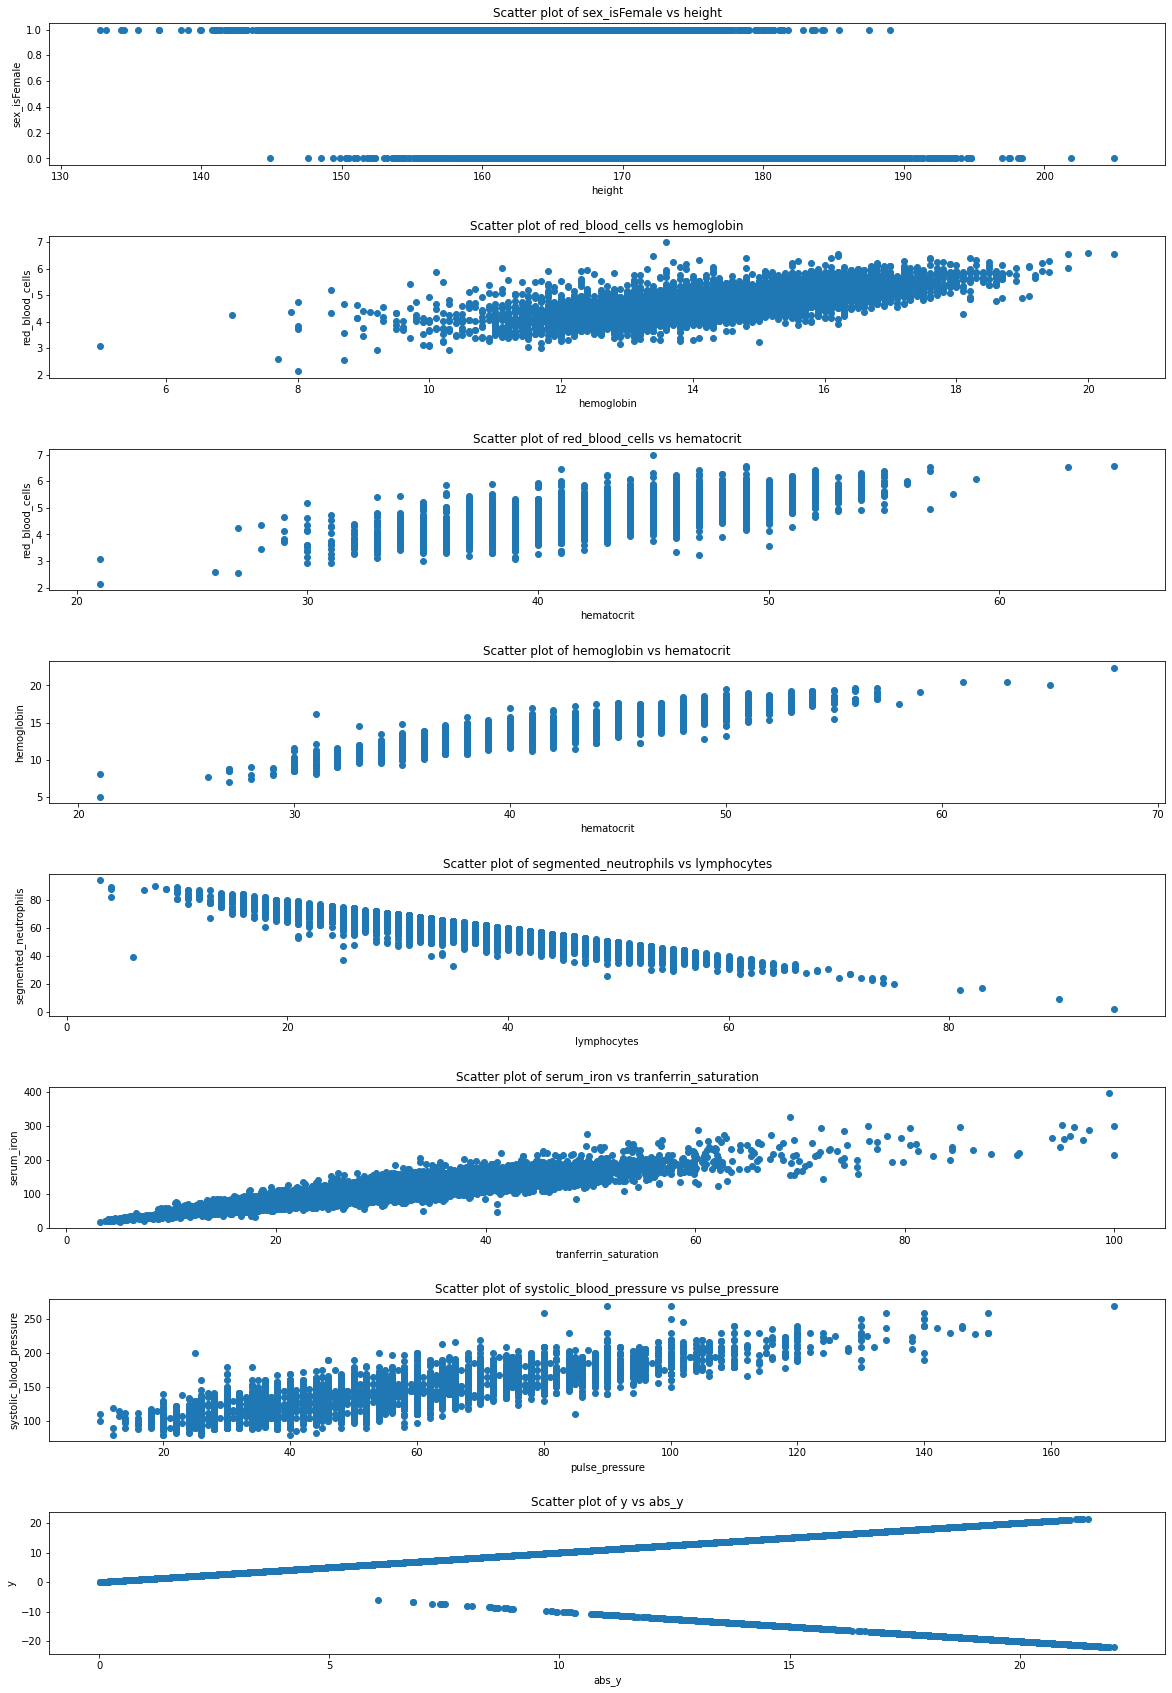

In [ ]:
# Create plots
fig, axes = plt.subplots(len(pred_combos),figsize=(20,30))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
for i, combo in enumerate(pred_combos):
    # Get the column names 
    var_1 = combo[0]
    var_2 = combo[1]
    # Print out the corresponding correlation
    print(f"Correlation of {var_2} vs {var_1}: {combo[2]}")
    # Output a scatter plot of the combination
    axes[i].scatter(x=mortality[var_1], y=mortality[var_2])
    # Label
    axes[i].set_xlabel(var_1)
    axes[i].set_ylabel(var_2)
    axes[i].set_title(f'Scatter plot of {var_2} vs {var_1}')

plt.show()

### Distributions

We plotted distributions in order to explore any anomalies in the data. Then we took a further look at marginal distributions by sex and race.

#### Distributions of variables

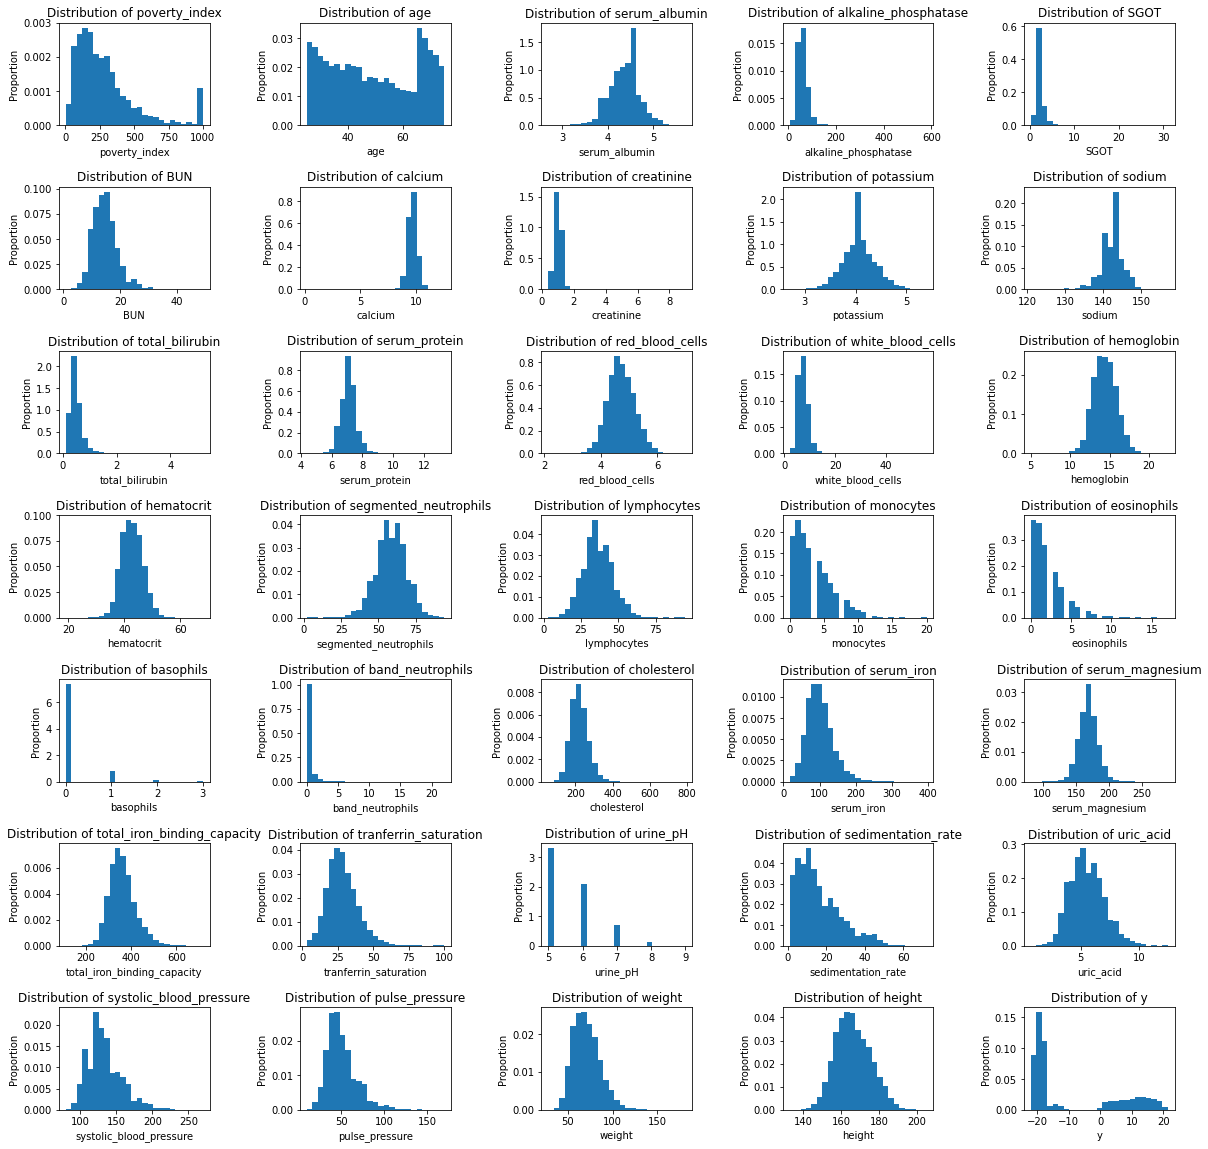

In [ ]:
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.6, wspace=0.6)

for i, pred in enumerate((mortality[numerical+['y']]).columns):
    axes[i].hist(mortality[pred], density=True, bins=25)
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'Distribution of {pred}')

plt.show()

#### Marginal Distributions by Sex

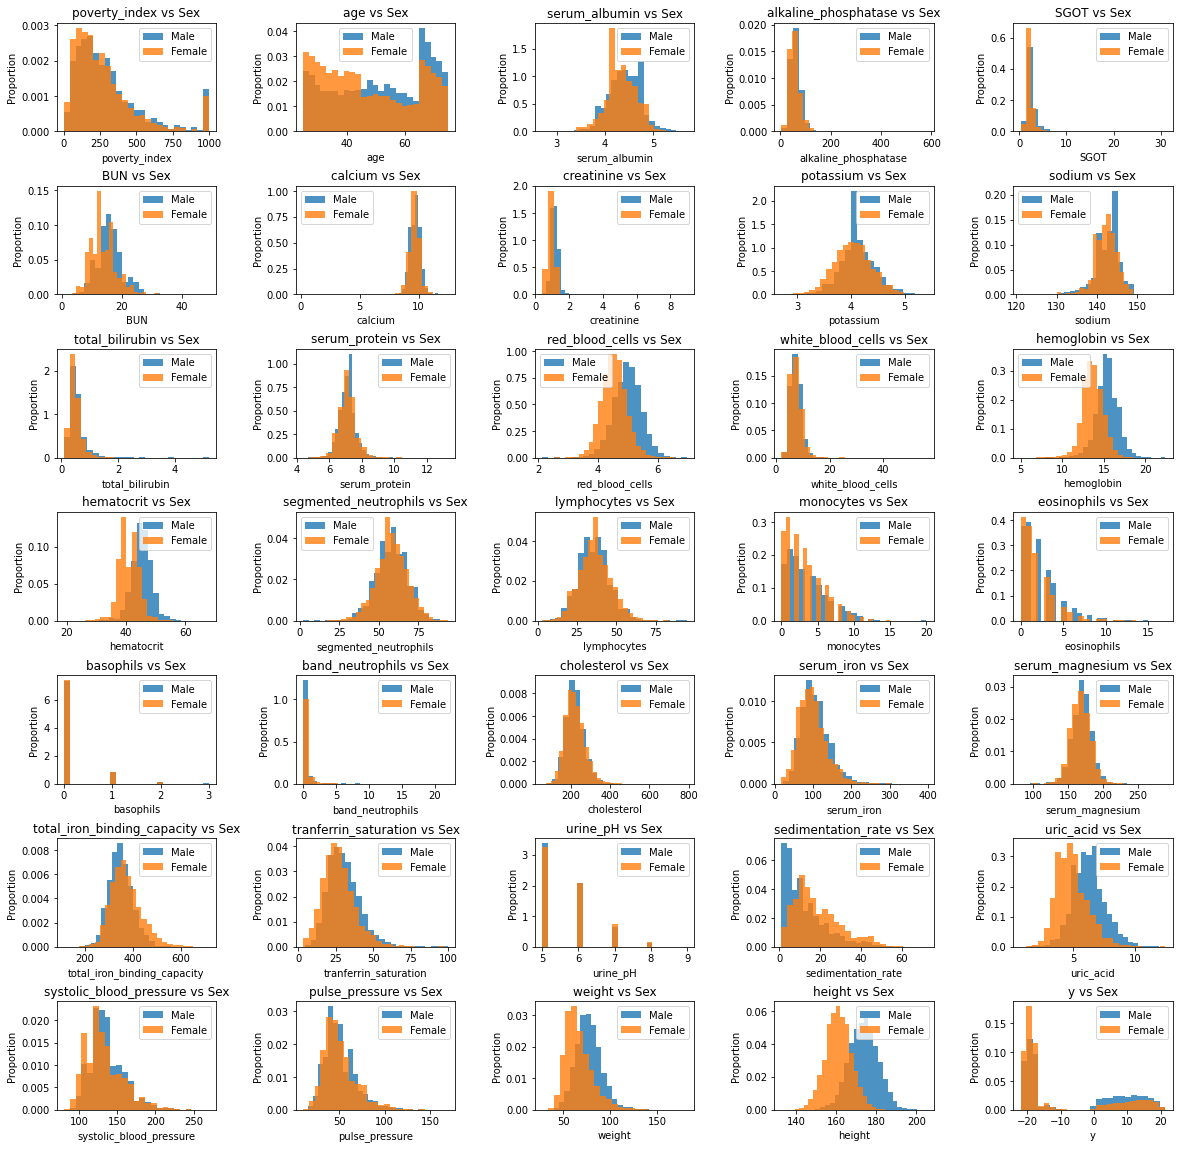

In [ ]:
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.5, wspace=0.5)

# Go through all the numerical predictors along with y
for i, pred in enumerate((mortality[numerical+['y']]).columns):
    # Plot histograms for that predictor for males
    axes[i].hist(mortality[mortality['sex_isFemale'] == 0][pred], density=True, bins=25, alpha=0.8, label='Male')
    # Plot histograms for that predictor for females
    axes[i].hist(mortality[mortality['sex_isFemale'] == 1][pred], density=True, bins=25, alpha=0.8, label='Female')
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'{pred} vs Sex')
    axes[i].legend()

plt.show()

#### Marginal Distributions by Race

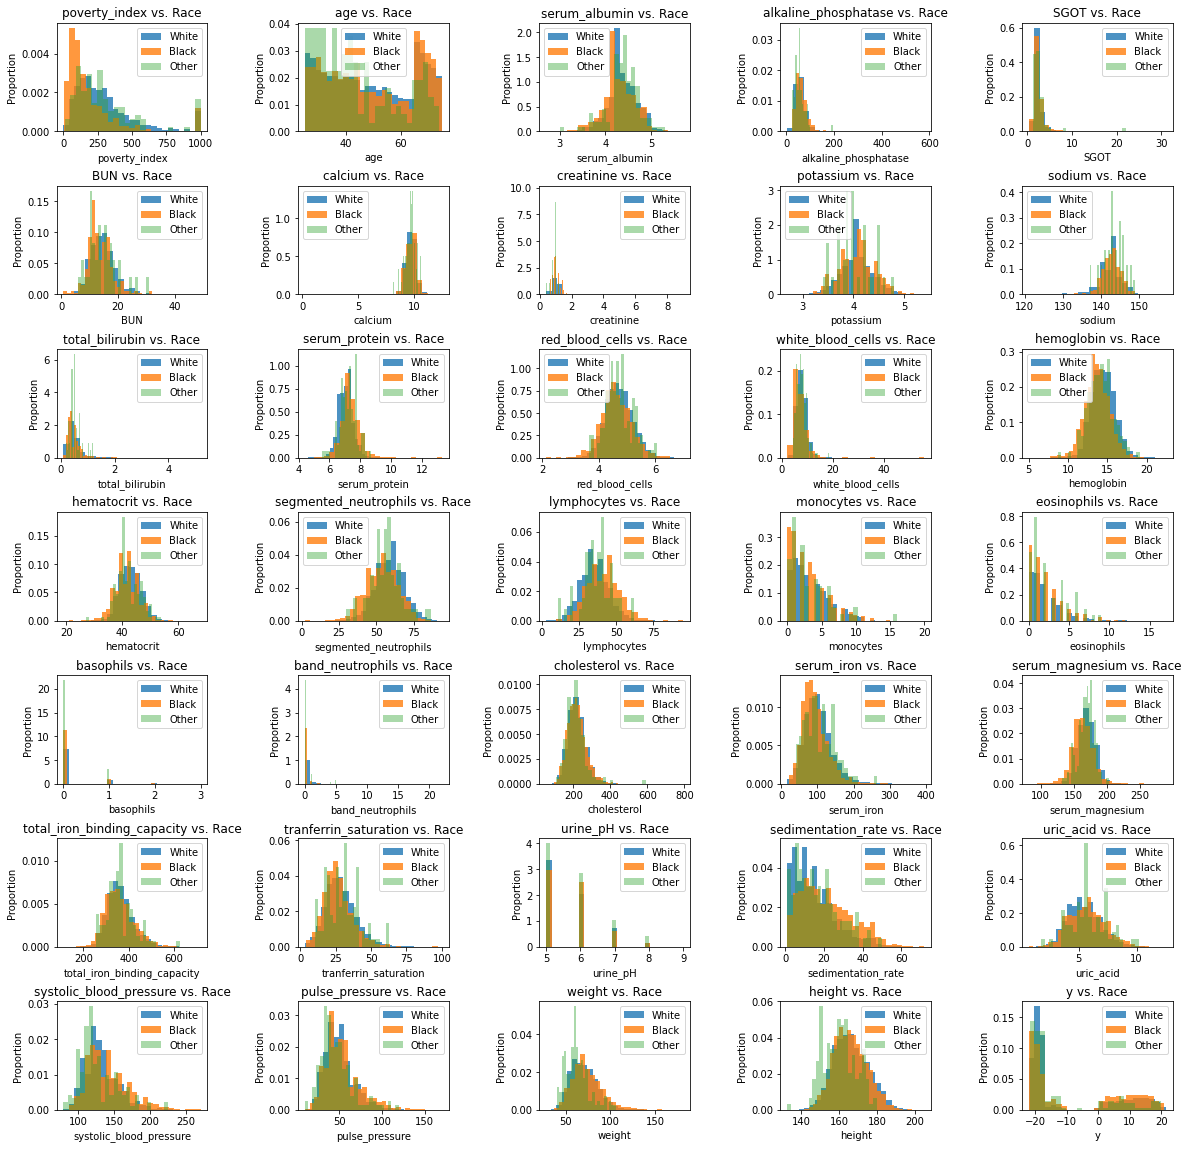

In [ ]:
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.5, wspace=0.6)

for i, pred in enumerate((mortality[numerical+['y']]).columns):
    axes[i].hist(mortality[mortality['race'] == 1][pred], density=True, bins=25, alpha=0.8, label='White')
    axes[i].hist(mortality[mortality['race'] == 2][pred], density=True, bins=25, alpha=0.8, label='Black')
    axes[i].hist(mortality[mortality['race'] == 3][pred], density=True, bins=25, alpha=0.4, label='Other')
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'{pred} vs. Race')
    axes[i].legend()

plt.show()

## Data Preparation 

### One Hot Encoding

In [ ]:
encoded_df = mortality.copy(deep=True)

encoded_sex = pd.get_dummies(encoded_df["sex_isFemale"], drop_first=True).rename({1: 'is_female'}, axis=1)
encoded_race = pd.get_dummies(encoded_df["race"]).rename({1: 'is_white', 2: 'is_black', 3:'is_other'}, axis=1)
encoded_platelets = pd.get_dummies(encoded_df["platelets_estimate"]).rename({'Decreased': 'decreased_platelets', 'Increased': 'increased_platelets', 'Normal':'normal_platelets'}, axis=1)
encoded_ualbumin = pd.get_dummies(encoded_df["urine_albumin"]).rename({'>=100': 'ualbumin_100', '>=1000': 'ualbumin_1000', '>=30':'ualbumin_30', '>=300':'ualbumin_300', 'Negative':'ualbumin_negative', 'Trace':'ualbumin_trace'}, axis=1)

labels = {}
for shade in pd.get_dummies(encoded_df["urine_glucose"]).columns:
    labels[shade] = 'uglucose_' + shade.lower()
encoded_uglucose = pd.get_dummies(encoded_df["urine_glucose"]).rename(labels, axis=1)

labels = {}
for size in pd.get_dummies(encoded_df["urine_hematest"]).columns:
    labels[size] = 'uhematest_' + size.lower()
encoded_uhematest = pd.get_dummies(encoded_df["urine_hematest"]).rename(labels, axis=1)

encoded_df = pd.concat([encoded_df, encoded_sex, encoded_race, encoded_platelets, encoded_ualbumin, encoded_uhematest], axis=1)
encoded_df.drop(columns=categorical,inplace=True)
encoded_df.drop(columns=["sequence_ID", "y", "abs_y"],inplace=True)

### Adding Indicator for confirmed deaths(0) and not confirmed deaths (1)

In [ ]:
confirmed = y<0

### Splitting the Dataset

In [ ]:
# Identify predictor and response variables
X = encoded_df.copy(deep=True)
y = mortality['y']

# indicator used to stratify the train-test split in order to ensure we have similar proportions of negative and postive y values
confirmed = y<0

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_seed, stratify=confirmed)

### Data Imputation

In [ ]:
imp = IterativeImputer(random_state=0, min_value=0)

X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)
X_train = pd.DataFrame(X_train, columns = encoded_df.columns)
X_test = pd.DataFrame(X_test, columns = encoded_df.columns)

[IterativeImputer] Early stopping criterion not reached.


### Experimentation

In [ ]:
# EXPERIMENTATIONNN
X_train_neg = X_train.iloc[np.where(y_train < 0)]
y_train_neg = y_train.iloc[np.where(y_train < 0)]
X_test_neg = X_test.iloc[np.where(y_test < 0)]
y_test_neg = y_test.iloc[np.where(y_test < 0)]

X_train_pos = X_train.iloc[np.where(y_train >= 0)]
y_train_pos = y_train.iloc[np.where(y_train >= 0)]
X_test_pos = X_test.iloc[np.where(y_test >= 0)]
y_test_pos = y_test.iloc[np.where(y_test >= 0)]

## Modelling

### Multiple Linear Regression

In [ ]:
def multiLinear(X_train, X_test, y_train, y_test):
    # Baseline multiple linear regression model (we will use more complex methods later on)
    regression_baseline = LinearRegression()
    regression_baseline.fit(X_train, y_train)

    y_pred_train = regression_baseline.predict(X_train)
    y_pred_test = regression_baseline.predict(X_test)

    train_score = mean_squared_error(y_train, y_pred_train)
    test_score = mean_squared_error(y_test, y_pred_test)

    print(f"MSE score on the training set is {train_score:.4f}")
    print(f"MSE score on the test set is {test_score:.4f}")

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"R-squared score on the training set is {r2_train:.4f}")
    print(f"R-squared score on the test set is {r2_test:.4f}")

# With encoding
multiLinear(X_train, X_test, y_train, y_test)
print('\n')
# With encoding, with abs
multiLinear(X_train, X_test, abs(y_train), abs(y_test))
print('\n')
# Without encoding
multiLinear(X_train[numerical], X_test[numerical], y_train, y_test)
print('\n')
# Without encoding, with abs
multiLinear(X_train[numerical], X_test[numerical], abs(y_train), abs(y_test))
print('\n')
# With encoding, positive only
multiLinear(X_train_pos, X_test_pos, y_train_pos, y_test_pos)
print('\n')
# With encoding, negative only
multiLinear(X_train_neg, X_test_neg, y_train_neg, y_test_neg)
print('\n')

MSE score on the training set is 136.6637
MSE score on the test set is 135.7134
R-squared score on the training set is 0.3429
R-squared score on the test set is 0.3367


MSE score on the training set is 19.7474
MSE score on the test set is 21.0777
R-squared score on the training set is 0.2826
R-squared score on the test set is 0.2509


MSE score on the training set is 137.6792
MSE score on the test set is 136.5710
R-squared score on the training set is 0.3380
R-squared score on the test set is 0.3325


MSE score on the training set is 20.1916
MSE score on the test set is 21.3573
R-squared score on the training set is 0.2665
R-squared score on the test set is 0.2410


MSE score on the training set is 27.7462
MSE score on the test set is 28.5714
R-squared score on the training set is 0.0873
R-squared score on the test set is 0.0485


MSE score on the training set is 3.0332
MSE score on the test set is 2.8666
R-squared score on the training set is 0.1575
R-squared score on the test set is

MSE score on the training set is 136.6637
MSE score on the test set is 135.7134
R-squared score on the training set is 0.3429
R-squared score on the test set is 0.3367


MSE score on the training set is 19.7474
MSE score on the test set is 21.0777
R-squared score on the training set is 0.2826
R-squared score on the test set is 0.2509


MSE score on the training set is 137.6792
MSE score on the test set is 136.5710
R-squared score on the training set is 0.3380
R-squared score on the test set is 0.3325


MSE score on the training set is 20.1916
MSE score on the test set is 21.3573
R-squared score on the training set is 0.2665
R-squared score on the test set is 0.2410


MSE score on the training set is 27.7462
MSE score on the test set is 28.5714
R-squared score on the training set is 0.0873
R-squared score on the test set is 0.0485


MSE score on the training set is 3.0332
MSE score on the test set is 2.8666
R-squared score on the training set is 0.1575
R-squared score on the test set is

### Single Decision Tree

In [ ]:
def decisionTree(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    tree = DecisionTreeRegressor()
    tree.fit(X_train_scaled, y_train)
    
    
    print(mean_squared_error(y_train, tree.predict(X_train_scaled)))
    print(mean_squared_error(y_test, tree.predict(X_test_scaled)))
    # compute r2
    print(tree.score(X_train,y_train))
    print(tree.score(X_test,y_test))


# With encoding
decisionTree(X_train, X_test, y_train, y_test)
print('\n')
# With encoding, with abs
decisionTree(X_train, X_test, abs(y_train), abs(y_test))
print('\n')
# Without encoding
decisionTree(X_train[numerical], X_test[numerical], y_train, y_test)
print('\n')
# Without encoding, with abs
decisionTree(X_train[numerical], X_test[numerical], abs(y_train), abs(y_test))
print('\n')
# With encoding, positive only
decisionTree(X_train_pos, X_test_pos, y_train_pos, y_test_pos)
print('\n')
# With encoding, negative only
decisionTree(X_train_neg, X_test_neg, y_train_neg, y_test_neg)
print('\n')

1.998675785896186e-32
280.36498284624065
-2.991756754413994
-3.059904322215898


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
1.4237142584465982e-32
39.05451544551046
-5.648472866722922
-5.506402738616844


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
1.7522637027035056e-32
281.4658671600914
-2.991756754413994
-3.059904322215898


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
4.380659256758764e-32
40.23651010054534
-9.182543687933931
-8.894117690871402


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
5.274181032556256e-32
61.351196038250

1.998675785896186e-32
280.36498284624065
-2.991756754413994
-3.059904322215898


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
1.4237142584465982e-32
39.05451544551046
-5.648472866722922
-5.506402738616844


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
1.7522637027035056e-32
281.4658671600914
-2.991756754413994
-3.059904322215898


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
4.380659256758764e-32
40.23651010054534
-9.182543687933931
-8.894117690871402


X has feature names, but DecisionTreeRegressor was fitted without feature names
X has feature names, but DecisionTreeRegressor was fitted without feature names
5.274181032556256e-32
61.351196038250

### SHAP values

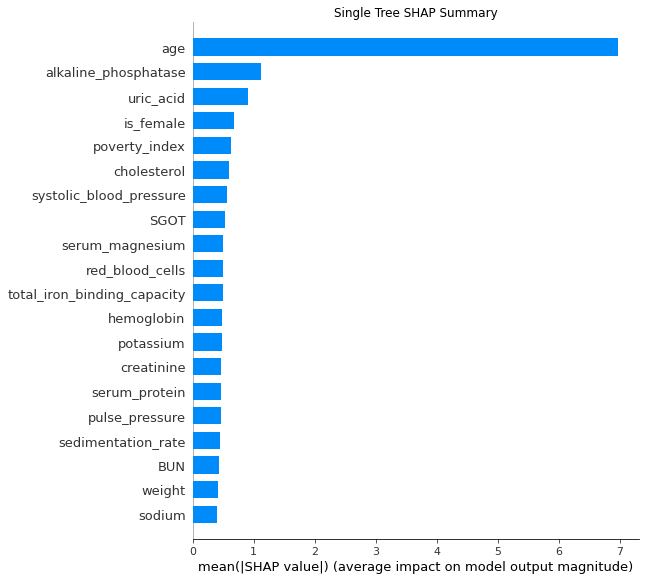

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)

shap_values = shap.TreeExplainer(tree).shap_values(shap.sample(X_train_scaled, 1000))
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, plot_type="bar", show=False)

plt.title("Single Tree SHAP Summary")
plt.savefig("Single_Tree_SHAP_Summary")

### Random Forest

In [ ]:
def randomForest(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = RandomForestRegressor(n_estimators=30, random_state=0)
    model.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_train, model.predict(X_train_scaled)))
    print(mean_squared_error(y_test, model.predict(X_test_scaled)))

    feature_list = list(X_train.columns)
    feature_importance = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
    print(feature_importance)

# With encoding
randomForest(X_train, X_test, y_train, y_test)
print('\n')
# With encoding, with abs
randomForest(X_train, X_test, abs(y_train), abs(y_test))
print('\n')
# Without encoding
randomForest(X_train[numerical], X_test[numerical], y_train, y_test)
print('\n')
# Without encoding, with abs
randomForest(X_train[numerical], X_test[numerical], abs(y_train), abs(y_test))
print('\n')
# With encoding, positive only
randomForest(X_train_pos, X_test_pos, y_train_pos, y_test_pos)
print('\n')
# With encoding, negative only
randomForest(X_train_neg, X_test_neg, y_train_neg, y_test_neg)
print('\n')

1.77522847014433
11.593406231917866
Non-confirmed                  9.400e-01
serum_protein                  2.541e-03
alkaline_phosphatase           2.366e-03
weight                         2.292e-03
age                            2.292e-03
serum_albumin                  2.270e-03
red_blood_cells                2.182e-03
white_blood_cells              2.163e-03
height                         2.150e-03
SGOT                           2.071e-03
sedimentation_rate             2.041e-03
cholesterol                    2.039e-03
serum_magnesium                2.003e-03
uric_acid                      1.893e-03
poverty_index                  1.864e-03
total_iron_binding_capacity    1.723e-03
total_bilirubin                1.697e-03
creatinine                     1.649e-03
calcium                        1.646e-03
hemoglobin                     1.622e-03
potassium                      1.600e-03
segmented_neutrophils          1.572e-03
systolic_blood_pressure        1.571e-03
lymphocytes          

### SHAP Values

In [ ]:
model = RandomForestRegressor(n_estimators=30, random_state=0)
model.fit(X_train_scaled, y_train)

shap_values = shap.TreeExplainer(model).shap_values(shap.sample(X_train_scaled, 1000))
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns, plot_type="bar", show=False)

plt.title("RandomForest SHAP Summary")
plt.savefig("RandomForest_SHAP_Summary")   

KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Principal Component Analysis

### Deep Neural Network

In [ ]:
def deepNNet(X_train, X_test, y_train, y_test, epochs):
    # Normalize the training and test data
    # Normalizing the data generally speeds up learning and leads to faster convergence.
    X_train_norm = normalize(X_train)
    X_test_norm = normalize(X_test)
    # Without encoding
    # Sequential models are models where we define our layers one after another
    deepnn = Sequential()
    # The output of one layer serves as the input for the next
    # We are adding three layers of neurons 
    # The activation function is ReLU, Rectified Linear Units
    # This takes all the values and normalizes them on a scale from 0 to 1
    # The ReLU algorithm basically assigns a value to either 0 or 1, depending which it is closer to
    # There will be 53 neurons in this layer 
    # Since this is the input layer, we want the input shape to be the number of columns we have
    deepnn.add(Dense(53, activation="relu", input_shape=(X_train_norm[0].shape)))
    # There will be 53 neurons in this layer 
    deepnn.add(Dense(53, activation="relu"))
    # There will be 1 neuron in this layer since we want to output a single value as the prediction
    deepnn.add(Dense(1))
    # Now we want to compile our model
    # The optimizer will be adam and the loss function will be mean squared error
    deepnn.compile(optimizer="adam", loss="mse", metrics=["mse"])

    num_epochs = 100
    # Now we want to fit our model on the training data over 100 epochs
    # Verbose will just output the metrics after each round of training
    # Validation data is the data on which to evaluate model metrics at the end of each epoch
    # The model will not be trained on this data
    logs = deepnn.fit(X_train_norm, y_train, epochs=epochs, batch_size=32, verbose=True, validation_data=(X_test_norm, y_test))

    print(deepnn.evaluate(X_train_norm, y_train))
    print(deepnn.evaluate(X_test_norm, y_test))

    return deepnn, logs

In [ ]:
# model_abs, logs_abs = deepNNet(X_train, X_test, abs(y_train), abs(y_test), epochs=100)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 11525 samples, validate on 2882 samples
Epoch 1/100
11525/11525 [==============================] - 3s 222us/sample - loss: 63.7847 - mean_squared_error: 63.7847 - val_loss: 27.5870 - val_mean_squared_error: 27.5870
Epoch 2/100
11525/11525 [==============================] - 2s 215us/sample - loss: 25.7309 - mean_squared_error: 25.7308 - val_loss: 25.1973 - val_mean_squared_error: 25.1973
Epoch 3/100
11525/11525 [==============================] - 3s 255us/sample - loss: 23.3150 - mean_squared_error: 23.3150 - val_loss: 23.2333 - val_mean_squared_error: 23.2333
Epoch 4/100
11525/11525 [==============================] - 2s 137us/sample - loss: 22.0064 - mean_squared_error: 22.0064 - val_loss: 22.4505 - val_mean_squared_error: 22.4505
Epoch 5/100
11525/11525 [==============================] - 1s 119us/sample - loss: 21.4103 - mean_squared_error: 21.4103 - val_loss: 22.0361 - val_mean_squared_error: 22.

In [ ]:
# Now we want to fit our model on the training data over 100 epochs
# Verbose will just output the metrics after each round of training
# Validation data is the data on which to evaluate model metrics at the end of each epoch
# The model will not be trained on this data
model, logs = deepNNet(X_train, X_test, y_train, y_test, epochs=100)

Train on 11525 samples, validate on 2882 samples
Epoch 1/100
11525/11525 [==============================] - 3s 266us/sample - loss: 215.3534 - mean_squared_error: 215.3533 - val_loss: 191.7098 - val_mean_squared_error: 191.7097
Epoch 2/100
11525/11525 [==============================] - 2s 172us/sample - loss: 182.0601 - mean_squared_error: 182.0601 - val_loss: 165.0602 - val_mean_squared_error: 165.0602
Epoch 3/100
11525/11525 [==============================] - 2s 188us/sample - loss: 157.2006 - mean_squared_error: 157.2005 - val_loss: 150.0586 - val_mean_squared_error: 150.0586
Epoch 4/100
11525/11525 [==============================] - 2s 154us/sample - loss: 147.6005 - mean_squared_error: 147.6006 - val_loss: 145.7422 - val_mean_squared_error: 145.7422
Epoch 5/100
11525/11525 [==============================] - 1s 120us/sample - loss: 143.4411 - mean_squared_error: 143.4411 - val_loss: 138.6029 - val_mean_squared_error: 138.6029
Epoch 6/100
11525/11525 [==============================]

In [ ]:
# logs_pos = deepNNet(X_train_pos, X_test_pos, y_train_pos, y_test_pos, epochs=100)

Train on 3829 samples, validate on 958 samples
Epoch 1/100
3829/3829 [==============================] - 1s 174us/sample - loss: 73.6765 - mean_squared_error: 73.6766 - val_loss: 30.2427 - val_mean_squared_error: 30.2427
Epoch 2/100
3829/3829 [==============================] - 0s 109us/sample - loss: 30.4751 - mean_squared_error: 30.4751 - val_loss: 29.9466 - val_mean_squared_error: 29.9466
Epoch 3/100
3829/3829 [==============================] - 0s 130us/sample - loss: 30.3781 - mean_squared_error: 30.3781 - val_loss: 30.0974 - val_mean_squared_error: 30.0974
Epoch 4/100
3829/3829 [==============================] - 1s 138us/sample - loss: 30.3629 - mean_squared_error: 30.3629 - val_loss: 29.8231 - val_mean_squared_error: 29.8231
Epoch 5/100
3829/3829 [==============================] - 0s 107us/sample - loss: 30.2188 - mean_squared_error: 30.2188 - val_loss: 29.9050 - val_mean_squared_error: 29.9050
Epoch 6/100
3829/3829 [==============================] - 0s 116us/sample - loss: 30.2499

In [ ]:
# logs_neg = deepNNet(X_train_neg, X_test_neg, y_train_neg, y_test_neg, epochs=100)

Train on 7696 samples, validate on 1924 samples
Epoch 1/100
7696/7696 [==============================] - 1s 159us/sample - loss: 110.8356 - mean_squared_error: 110.8355 - val_loss: 3.7397 - val_mean_squared_error: 3.7397
Epoch 2/100
7696/7696 [==============================] - 1s 109us/sample - loss: 3.8016 - mean_squared_error: 3.8016 - val_loss: 3.4983 - val_mean_squared_error: 3.4983
Epoch 3/100
7696/7696 [==============================] - 1s 122us/sample - loss: 3.6692 - mean_squared_error: 3.6692 - val_loss: 3.3945 - val_mean_squared_error: 3.3945
Epoch 4/100
7696/7696 [==============================] - 1s 121us/sample - loss: 3.5960 - mean_squared_error: 3.5960 - val_loss: 3.3102 - val_mean_squared_error: 3.3102
Epoch 5/100
7696/7696 [==============================] - 1s 111us/sample - loss: 3.5120 - mean_squared_error: 3.5120 - val_loss: 3.2946 - val_mean_squared_error: 3.2946
Epoch 6/100
7696/7696 [==============================] - 1s 117us/sample - loss: 3.4707 - mean_squared_

In [ ]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

In [ ]:
nn_shap_explainer = shap.DeepExplainer(model, shap.sample(X_train_norm, 500))

In [ ]:
nn_shap_values = nn_shap_explainer.shap_values(X_train_norm)

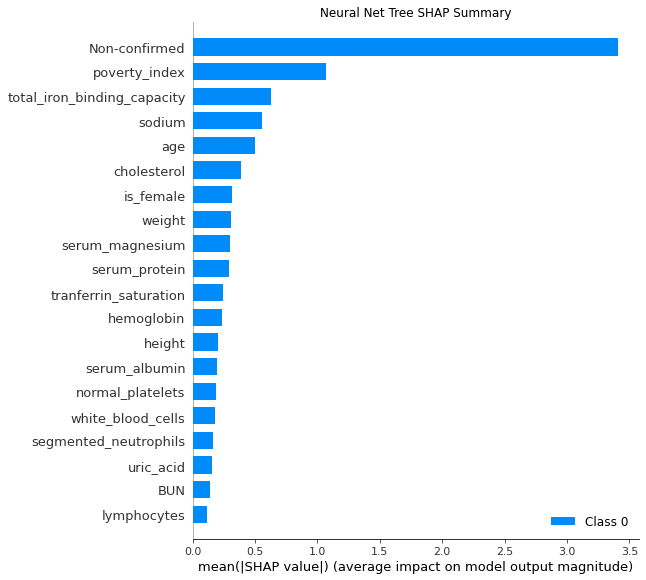

In [ ]:
shap.summary_plot(nn_shap_values, X_train_norm, feature_names=X_train.columns, show=False)
plt.title("Neural Net SHAP Summary")
plt.savefig("Neural_Net_SHAP_Summary_100")   

## Conclusion

THIS IS NOT OURS!!!! THIS IS JUST AN EXAMPLE TO FOLLOW 
We achieve the best fit curves and loss using a combination model of CNN and LSTM, with dropout to the recurrent activations of the LSTM layers and the Dense layers towards the end. We train on 14-day windows of data, predicting 7 days ahead. The network learns and can reasonably reproduce a number of differently shaped growth curves, including those with multiple local maxima. 

The model learns to map 14-day histories to 7-day predictions into the future based on a country's case, testing, and mobility data, but with no explicit mapping to specific countries. It is a general model meant to make predictions for 7 days based on the preceding 2 weeks, and thus tries to learn how these relationships generally unfold. The plotted predictions therefore do not rely on those of the preceding sequence, as they are independent, hence these lines look somewhat jagged; every round of prediction is made without other context than the preceding 14 days of inputs. This can be improved in future work, but in this case our goal was to make a general country-agnostic and history-agnostic predictor. It is therefore interesting how closely it generally follows the curves, and the extent to which it seems able to anticipate spikes.

It also appears that the model is successfully able to alert to undiagnosed case load increases. In Norway at day 10, Canada at day 60, Sweden at day 60 and the Netherlands at day 20, the model suggests a higher than reported number of new cases per 100k citizens that is subsequently validated by dramatic spikes within 5-10 days after that. Judging by the shape of the data, these almost look like the government caught up on belated or missing measurements. 

One counter example may be Germany, where the model appears to be predicting continual rapid growth when the curve is really peaking. We think this is actual a correct prediction contrary to that small but sudden drop in Germany's rising curve, where our model predicted continued growth in spite of the drop. Following that, the model adjusts and almost perfectly predicts Germany's peak.

In countries like Italy, Switzerland, France and Spain, the model does very well aligning with those nation's peaks and keeping ahead of the decline in caseload. The United States remains a problematic outlier. Because the country plateaued in its efforts to contain and combat the virus during April, there has been a persistent and stable new case growth for multiple weeks. This trend goes against that experienced by nearly every other impacted nation and makes a generalizable model extremely difficult to apply to the American experience. 

This appears to also be occurring in the United Kingdom, which within the past 5 days is seeing a separation between growth expected by other nations and the case growth observed. In this scenario, our recommendation would be to use this model to identify outlier nations who continue to experience difficulty as a way of flagging those whose response is not yet sufficient or who were successfully on trend but may have elected to re-open too soon. The fact that the model continues to predict a declining caseload for the UK means the UK has more cases than countries with comparable 14-day histories of case, test, and mobility data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24ab17b8-b2f8-4eb1-897f-b86e4cf16ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>